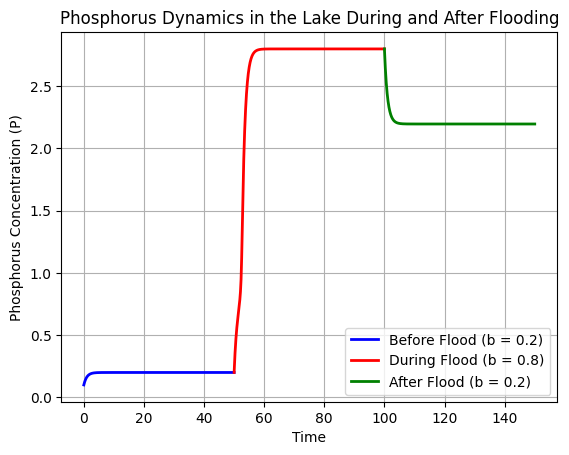

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Parameters
q = 8
r = 2            # Recycling parameter
b_initial = 0.2  # Initial influx parameter before flooding
b_flood = 0.8    # Influx parameter during flooding
time_flood = 50  # Duration of flooding period
b_recovery = 0.2 # Influx after flooding

# Define the differential equation for the lake eutrophication model
# dp/dt = b - p + (r * p**q) / (p**q + 1)
def eutrophication_model(p, t, b):
    return b - p + (r * p**q) / (p**q + 1)

# Time settings for simulation
time_initial = np.linspace(0, 50, 500)       # Initial time before flooding
time_flood_period = np.linspace(50, 100, 500) # Time during flooding
time_recovery = np.linspace(100, 150, 500)   # Time after flooding

# Initial condition: small amount of phosphorus, P(0) ~ 0.1
P0 = 0.1

# Solving the differential equation using odeint
# 1. Initial phase with b = 0.2 (before flooding)
P_initial = odeint(eutrophication_model, P0, time_initial, args=(b_initial,))

# 2. Flooding phase with b = 0.8 (during flooding)
P_flood = odeint(eutrophication_model, P_initial[-1], time_flood_period, args=(b_flood,))

# 3. Recovery phase, return b to 0.2 (after flooding)
P_recovery = odeint(eutrophication_model, P_flood[-1], time_recovery, args=(b_recovery,))

# Plot the results using different colors for each phase
plt.figure()
plt.plot(time_initial, P_initial, 'b-', linewidth=2, label='Before Flood (b = 0.2)')
plt.plot(time_flood_period, P_flood, 'r-', linewidth=2, label='During Flood (b = 0.8)')
plt.plot(time_recovery, P_recovery, 'g-', linewidth=2, label='After Flood (b = 0.2)')

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Phosphorus Concentration (P)')
plt.title('Phosphorus Dynamics in the Lake During and After Flooding')
plt.grid(True)

# Add legend
plt.legend()

# Display the plot
plt.show()


<ipython-input-2-52ce59e8be0c>:13: RuntimeWarning: invalid value encountered in power
  return P**q / (P**q + 1)
<ipython-input-2-52ce59e8be0c>:27: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  P_equilibria[i] = fsolve(equilibrium_eq, 0.5, args=(b, q, r))[0]
<ipython-input-2-52ce59e8be0c>:27: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  P_equilibria[i] = fsolve(equilibrium_eq, 0.5, args=(b, q, r))[0]


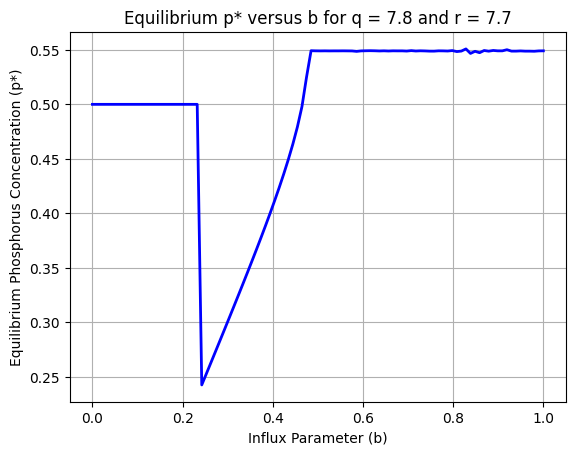

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Parameters for Lake Mendota
q = 7.8          # Nonlinear recycling exponent
r = 7.7          # Recycling parameter
b_range = np.linspace(0, 1, 100)  # Range of b values (from 0 to 1)

# Define the nonlinear function N(P)
# N(P) = P^q / (P^q + 1)
def N(P, q):
    return P**q / (P**q + 1)

# Initialize array to store equilibrium phosphorus concentrations (p*)
P_equilibria = np.zeros(len(b_range))

# Function to calculate equilibrium phosphorus concentration
# It represents the equilibrium equation N(P) - (P/r - b/r) = 0
def equilibrium_eq(P, b, q, r):
    return N(P, q) - (P / r - b / r)

# Calculate equilibria for various b values
for i, b in enumerate(b_range):
    # Use fsolve to solve the equilibrium equation numerically
    # Initial guess for P is set to 0.5
    P_equilibria[i] = fsolve(equilibrium_eq, 0.5, args=(b, q, r))[0]

# Plot equilibrium phosphorus concentration (p*) versus the influx parameter (b)
plt.figure()
plt.plot(b_range, P_equilibria, 'b-', linewidth=2)
plt.xlabel('Influx Parameter (b)')
plt.ylabel('Equilibrium Phosphorus Concentration (p*)')
plt.title(f'Equilibrium p* versus b for q = {q} and r = {r}')
plt.grid(True)
plt.show()


<ipython-input-4-cc7adec55be6>:37: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  equilibria = fsolve(equilibrium_eq, 0.5, args=(b, r))  # Initial guess is 0.5


Equilibrium at P = 0.6818 is stable for b = 0.60 and r = 2.0


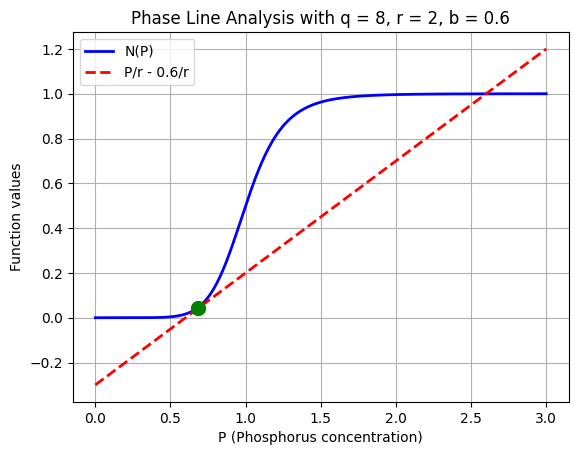

Equilibrium at P = 0.1200 is stable for b = 0.12 and r = 2.0


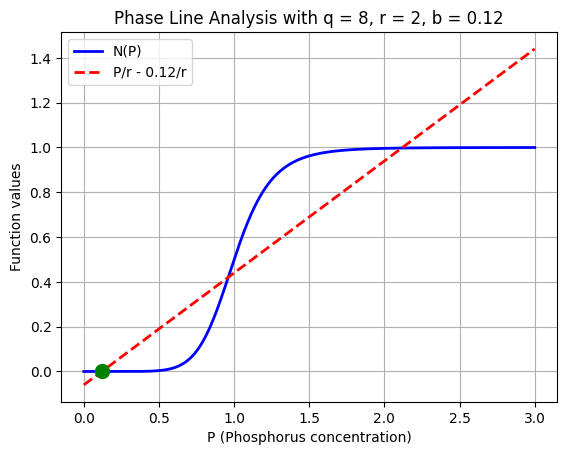

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import sympy as sp

# Parameters
q = 8
r_values = [2]  # Recycling parameter to study
b_values = [0.6, 0.12]  # Two values of b to study

# Define the nonlinear function N(P)
def N(P, q):
    return P**q / (P**q + 1)

# Define symbolic variable P for symbolic differentiation
P_sym = sp.symbols('P_sym')

# Define the nonlinear function N(P) symbolically for differentiation
N_sym = P_sym**q / (P_sym**q + 1)

# Compute the derivative of N(P) symbolically
dN_dP_sym = sp.diff(N_sym, P_sym)
dN_dP_func = sp.lambdify(P_sym, dN_dP_sym)  # Convert to a function using lambdify

# Define the equilibrium equation: N(P) = P/r - b/r
def equilibrium_eq(P, b, r):
    return N(P, q) - (P / r - b / r)

# Range of P values for numerical solution and plotting
P_range = np.linspace(0, 3, 1000)

# Loop over b values and r values
for r in r_values:
    for b in b_values:

        # Find approximate equilibrium points by solving N(P) = LHS(P)
        equilibria = fsolve(equilibrium_eq, 0.5, args=(b, r))  # Initial guess is 0.5

        # Plot the functions to visualize equilibria
        plt.figure()
        plt.plot(P_range, N(P_range, q), 'b-', linewidth=2, label='N(P)')
        plt.plot(P_range, P_range / r - b / r, 'r--', linewidth=2, label=f'P/r - {b}/r')
        plt.xlabel('P (Phosphorus concentration)')
        plt.ylabel('Function values')
        plt.title(f'Phase Line Analysis with q = {q}, r = {r}, b = {b}')
        plt.legend()

        # Mark equilibria
        plt.plot(equilibria, N(equilibria, q), 'go', markersize=10, markerfacecolor='g', label='Equilibria')
        plt.grid(True)

        # Stability analysis: Compute derivative at equilibrium points
        stability = dN_dP_func(equilibria) - 1  # Stability criterion

        if stability < 0:
            print(f'Equilibrium at P = {equilibria[0]:.4f} is stable for b = {b:.2f} and r = {r:.1f}')
        else:
            print(f'Equilibrium at P = {equilibria[0]:.4f} is unstable for b = {b:.2f} and r = {r:.1f}')

        plt.show()

